# Loan Application Study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prev">Getting aggregations from previous dataset:</a></li>
<li><a href="#all">Working with all applications [Prev & Curr]</a></li>
<ul>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusion of Analysis</a></li>
    <li><a href="#modeling">Modeling</a></li>
</ul>
</ul>

<a id='intro'></a>
## Introduction
> **Business Overview:**
The business revolves around providing financial assistance to individuals or businesses in the form of loans. When someone applies for a loan, they are requesting a specific amount of money to be lent to them for a defined purpose. The lending institution evaluates the applicant's creditworthiness, risk profile, and financial stability to make informed decisions about granting or denying the loan.
>
> **Problem Statement:**
> The problem is to predict whether a loan will be approved or not based on the applicant's information.
> 
> **Data set:** You can find it [here](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=application_data.csv) on Kaggle. Consists of two files: current application data and previous applications data.
>
> **Strategy of using both datasets:**
> I will use the previous dataset only to get aggregated information about the applicant's history.\
Then I will merge it with the current application data to get the final dataset for analysis.

> ### Questions for Analysis we need to answer.
>
> **Applicant's info**
> 1. How does the clients' Demographics such as the age related to the approval?
> 2. Is there a relation between income and the approval of loan?
> 3. How does the type of work or housing sitiuation related to the approval?
>
> **Application's info**
> 1. Is there an optimal day of the week or time of day for applicants to submit their loan requests for higher approval chances?

In [595]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

curr_df = pd.read_csv('./Dataset/application_data.csv')
prev_df = pd.read_csv('./Dataset/previous_application.csv')

curr_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
prev_df.head(2)

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


> Making the names of the columns in lower case for simplicity

In [3]:
curr_lower_case_columns_dict = {column: column.lower() for column in curr_df.columns}
prev_lower_case_columns_dict = {column: column.lower() for column in prev_df.columns}

curr_df.rename(columns=curr_lower_case_columns_dict, inplace=True)
prev_df.rename(columns=prev_lower_case_columns_dict, inplace=True)

curr_df.head(1)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Functions we will use

In [569]:
def get_percentage_of_missing(dataframe):
    """
        Getting the percentage of missing values in the dataframe
        Input:
            dataframe
        Output:
            percentage: like .value_counts() but with column name and the corresponding % of missing value.
    """
    columns_with_missing_values = dataframe.loc[:, df.isna().sum() > 0]
    percentages = (columns_with_missing_values.isna().sum() / dataframe.shape[0]) * 100
    
    return percentages.sort_values(ascending=False)

<a id='prev'></a>

## Getting aggregations from previous dataset

In [4]:
prev_df.groupby(['sk_id_curr', 'sk_id_prev']).count()['name_contract_type'].head()

sk_id_curr  sk_id_prev
100001      1369693       1
100002      1038818       1
100003      1810518       1
            2396755       1
            2636178       1
Name: name_contract_type, dtype: int64

> There are many current applications that have previous applications.
> 
> For this reason we will aggregate the previous applications data to get the insights we need and then merge it with the current applications data.

In [231]:
# Dataframe we will save our aggregated data to
agg_df = pd.DataFrame()

> **For approved applications:**
> 1. The average amount of credit taken by the applicant.
> 2. The average amount of annuity approved for the applicant.

> **Note**: for approved due to get intiuation about how much the applicant can pay back.

> Calculating the avg amout of credit taken by the applicant
> 
> **amt_application** -> is the amount of credit requested by the applicant.\
> **amt_credit** -> is the amount of credit granted to the applicant.
> 
> **Notice**: So, we will use amt_creadit for approved applications.

In [232]:
approved_df = prev_df.query('name_contract_status == "Approved"')

approved_df = approved_df.groupby('sk_id_curr').agg({
    'amt_credit': 'mean',
    'amt_annuity': 'mean',
    })

> **For only approved and refused applications as our target is to approve or refuse the loan:**

In [233]:
grouped_data_approval_refusion = prev_df.groupby(['sk_id_curr', 'name_contract_status']).count().unstack(fill_value=0)['sk_id_prev']

agg_df['approval_rate'] = grouped_data_approval_refusion['Approved'] / grouped_data_approval_refusion.sum(axis=1)
agg_df['rejection_rate'] = grouped_data_approval_refusion['Refused'] / grouped_data_approval_refusion.sum(axis=1)

def get_previous_status(row, threshold=0.1):
    """
    Returns the previous status as 'Good' = 1 or 'Bad' = -1 based on the approval and rejection rates
    Inputs:
        row: A row of the dataframe
        threshold: The threshold that cause giving 'Good' sign hard a bit. [Minimising the risk]
    
    Returns:
        1: If the previous status was good
        -1: If the previous status was bad
        0: If the previous status was neutral
    """
    
    status = row.approval_rate - row.rejection_rate
    
    if status > threshold:
        return 1
    elif 0 < status < threshold:
        return 0
    else:
        return -1
    
agg_df['prev_status'] = agg_df.apply(lambda row: get_previous_status(row), axis=1)

In [234]:
# No need for the approval and rejection rates anymore
agg_df.drop(columns=['approval_rate', 'rejection_rate'], inplace=True)


# Merging the 2 aggregation datasets
agg_df = approved_df.merge(agg_df, on='sk_id_curr', how='inner')

In [235]:
# Renaming the columns
agg_df.rename(columns={'amt_credit': 'prev_avg_approved_credit', 'amt_annuity': 'prev_avg_approved_annuity'}, inplace=True)

In [236]:
agg_df.sample(5)

,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
sk_id_curr,,,
184263,309853.125000,13836.521250,1
338857,413019.642857,22868.935714,1
173516,494355.000000,25399.710000,1
101130,94673.250000,12027.015000,1
103412,128018.250000,8633.385000,1


In [237]:
# The Nan values here will be error in data, so we will drop them
agg_df.isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    2
prev_status                  0
dtype: int64

In [238]:
agg_df.dropna(inplace=True)
agg_df.isna().any()

prev_avg_approved_credit     False
prev_avg_approved_annuity    False
prev_status                  False
dtype: bool

> Now we finished got features we need from the previous data, Now lets add these values with the current dataset

In [239]:
df = curr_df.merge(agg_df, on='sk_id_curr', how='left')
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.00,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.00,56553.990,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,20106.00,5357.250,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,343728.90,21842.190,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,166638.75,12278.805,1.0


## Working with all the applications [prev & curr]

### Data Assessing

In [240]:
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.00,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.00,56553.990,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,20106.00,5357.250,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,343728.90,21842.190,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,166638.75,12278.805,1.0


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 125 entries, sk_id_curr to prev_status
dtypes: float64(68), int64(41), object(16)
memory usage: 295.6+ MB


> Checking for duplicated documets

In [242]:
print(f'Number of duplicated applications is: {int(df.duplicated().any())}')

Number of duplicated applications is: 0


> Checking how much new documents that not have history

In [251]:
print(f'There are {df.prev_status.isna().sum()} new applications that have no history')

There are 17448 new applications that have no history


> Missing data in columns

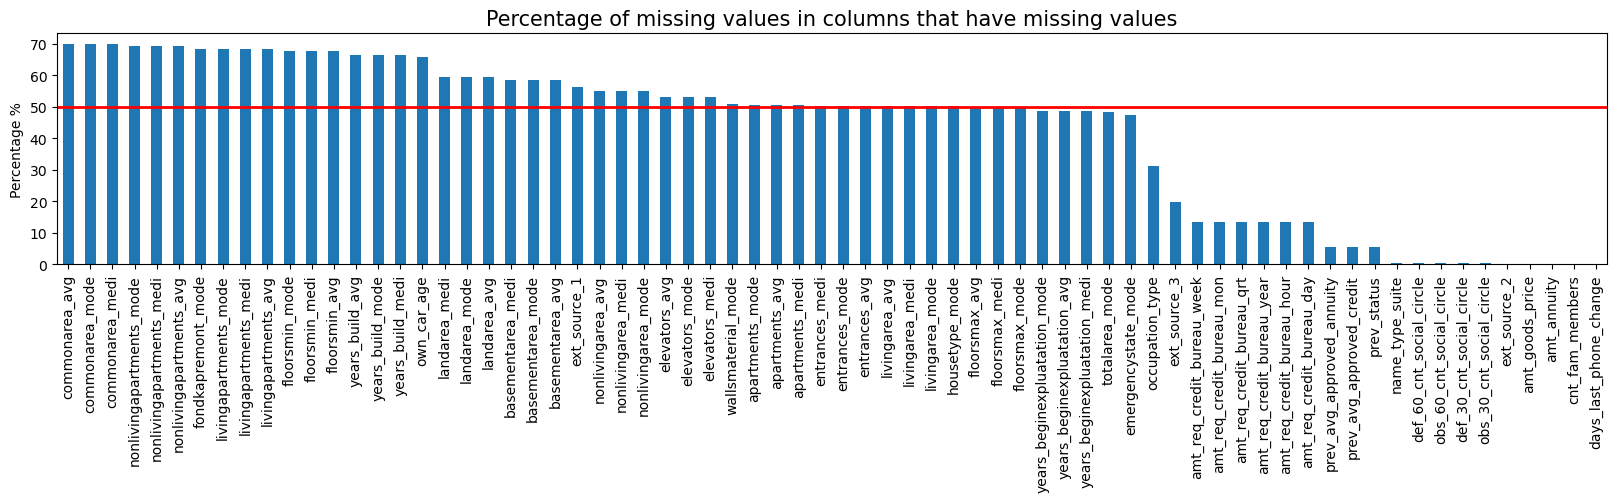

In [570]:
percentage_per_column = get_percentage_of_missing(df)

percentage_per_column.plot(kind='bar', figsize=(20, 3));
plt.axhline(50, c='r', linewidth=2);
plt.title('Percentage of missing values in columns that have missing values', fontsize=15);
plt.ylabel('Percentage %', fontsize=10);

> Columns with more than 50% missing values we will drop them.

> Checking categorical columns.
>
> **Note**: Threshould chosen to `8` after considering the columns for the `name_income_type` column

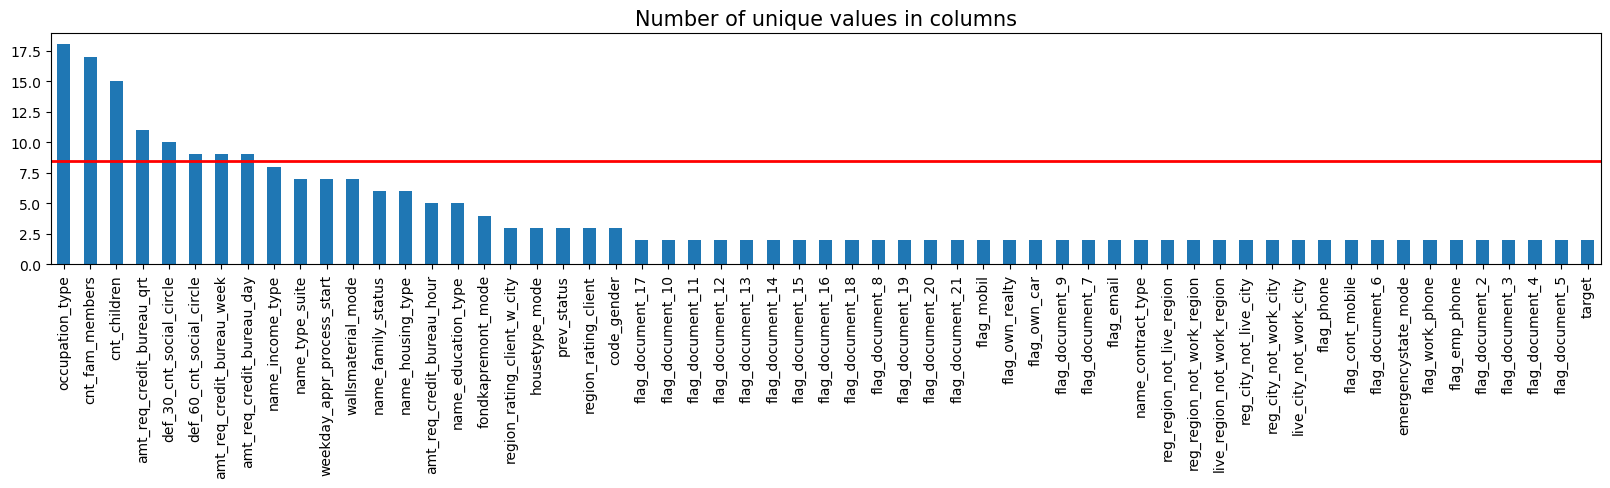

In [517]:
threshould = 8.5
suggested_categorical_columns = df.loc[:, (df.nunique() < 24)].nunique().sort_values(ascending=False)

suggested_categorical_columns.plot(kind='bar', figsize=(20, 3));
plt.axhline(threshould, c='r', linewidth=2);
plt.title('Number of unique values in columns', fontsize=15);

> * Most categorical columns are `Binary`.
> * Columns under the line considered categorical.
> * **Exception:** There are some columns under the threshould not categorical columns such as:\
`amt_req_credit_bureau_hour` as it is the number of enquiries to Credit Bureau about the client one hour before application

In [518]:
categorical_df = df.loc[:, (df.nunique().sort_values(ascending=False) < threshould)]

In [534]:
categorical_df.drop(columns='amt_req_credit_bureau_hour', inplace=True)

> Checking missing values in categorical columns

In [572]:
get_percentage_of_missing(categorical_df)

fondkapremont_mode     68.386172
wallsmaterial_mode     50.840783
housetype_mode         50.176091
emergencystate_mode    47.398304
prev_status             5.673943
name_type_suite         0.420148
dtype: float64

> `fondkapremont_mode`, `wallsmaterial_mode`, `housetype_mode`, `emergencystate_mode` will be droped as they have missing values ~ 50%.
> 
> `prev_status` column null values comes from not having a history, So we will handel it with `0` as not approved or rejected before.
> 
> `name_type_suite` missing values will replaced with `Unaccompanied` as `the mode`.

### Data Cleaning

In [613]:
df_cleaning = df.copy()

> First lets give `0` for all null values in the columns come from the previous docs.

In [614]:
df_cleaning.iloc[:, -3:].isna().sum()

prev_avg_approved_credit     17448
prev_avg_approved_annuity    17448
prev_status                  17448
dtype: int64

In [615]:
df_cleaning.iloc[:, -3:] = df_cleaning.iloc[:, -3:].fillna(0)
df_cleaning.iloc[:, -3:].isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    0
prev_status                  0
dtype: int64

> lets drop all columns with % missing values >= 50%

In [618]:
columns_with_50Per_missing = (get_percentage_of_missing(df_cleaning) > 50).index.tolist()
df_cleaning.drop(columns=columns_with_50Per_missing, inplace=True)

df_cleaning.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
